### LOFAR calibration solutions
#### The aim is to investigate the ionospheric signal extracted during the calibration routine


First we load the numpy file that contains data and time variables. 
The 'data' variable has ionospheric phases converted into dTEC for core and remote baselines

In [1]:
import numpy as np

In [3]:
file=np.load('L80898.npz',allow_pickle=True)

The above returns a dictionary-like object, containing {filename: array} key-value pairs, one for each file in the archive
We check the variables that exist in the file:

In [6]:
for k in file.keys():
    print(k)

data
times


We can extract these variables separately by using:

In [7]:
data=file['data']
times=file['times']

Or we can extract them with the following code; it creates variables with the same names as keys in the original file 

In [8]:
for k, v in file.items():
    exec(f"{k} = v")

We can take a closer look at the dtec solutions

In [9]:
print(data.shape)

(56, 2876)


This observation has 2876 time samples of ionospheric solutions for 56 baselines. Let's plot them to see how variable is the ionosphere during this observation.

In [11]:
import matplotlib.pyplot as plt

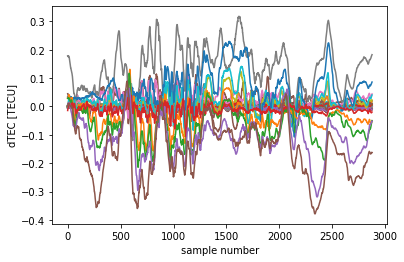

In [13]:
fig,axs=plt.subplots()
axs.plot(np.arange(len(data[0,:])),data.T)
axs.set_xlabel('sample number')
axs.set_ylabel('dTEC [TECU]')
plt.show()
plt.close()

We can see that different baselines detect similar patterns; since there are both core and remote stations included, let's plot them separately. To do this, we need to have information on the station names, which can be found in the 'stations.npz' file. 

##### Exercise:
Load the stations.npz file, check 

In [30]:

import math as m
import matplotlib.pyplot as plt
import os,glob,subprocess
#from scipy.interpolate import griddata,interp1d
#from numpy.linalg import norm
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import coordinates as coord
from astropy.time import Time
from astropy import units as u
#import pywt
#import matplotlib.tri as tri
import matplotlib.colors as cm
import itertools
#from scipy.interpolate import splev, splrep
#from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
#from collections import Counter
import pycwt
#from sklearn.decomposition import PCA
import scipy
#from functions import *
import lofarantpos.db

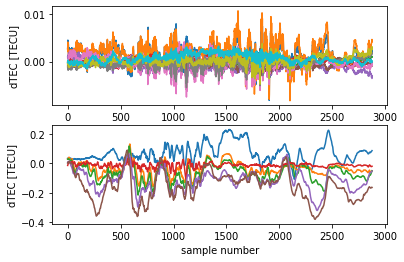

In [22]:
fig,axs=plt.subplots(2)
axs[0].plot(np.arange(len(data[0,:])),data[:10,:].T)
axs[1].plot(np.arange(len(data[0,:])),data[50:,:].T)
axs[1].set_xlabel('sample number')
axs[1].set_ylabel('dTEC [TECU]')
axs[0].set_ylabel('dTEC [TECU]')
plt.show()
plt.close()

#### EXERCISE 
#### in the plot above, plot all core stations in the upper panel and all remote stations in the lower panel

In [40]:
stations=np.load('stations.npz',allow_pickle=True)['stats']
stations=np.array([stats.decode() for stats in stations])
print(stations)

['CS001HBA0' 'CS001HBA1' 'CS002HBA0' 'CS002HBA1' 'CS003HBA0' 'CS003HBA1'
 'CS004HBA0' 'CS004HBA1' 'CS005HBA0' 'CS005HBA1' 'CS006HBA0' 'CS006HBA1'
 'CS007HBA0' 'CS007HBA1' 'CS011HBA0' 'CS011HBA1' 'CS017HBA0' 'CS017HBA1'
 'CS021HBA0' 'CS021HBA1' 'CS024HBA0' 'CS024HBA1' 'CS026HBA0' 'CS026HBA1'
 'CS028HBA0' 'CS028HBA1' 'CS030HBA0' 'CS030HBA1' 'CS031HBA0' 'CS031HBA1'
 'CS032HBA0' 'CS032HBA1' 'CS101HBA0' 'CS101HBA1' 'CS103HBA0' 'CS103HBA1'
 'CS201HBA0' 'CS201HBA1' 'CS301HBA0' 'CS301HBA1' 'CS302HBA0' 'CS302HBA1'
 'CS401HBA0' 'CS401HBA1' 'CS501HBA0' 'RS106HBA' 'RS205HBA' 'RS208HBA'
 'RS305HBA' 'RS306HBA' 'RS307HBA' 'RS406HBA' 'RS407HBA' 'RS503HBA'
 'RS508HBA' 'RS509HBA']


### SPATIAL PLOTS OF DTEC

In [64]:
db = lofarantpos.db.LofarAntennaDatabase()
pp=np.array([db.phase_centres[stat] for stat in stations])

print(stations[0],pp[0])

CS001HBA0 [3826896.631  460979.131 5064657.943]


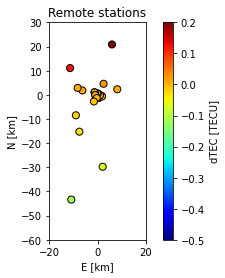

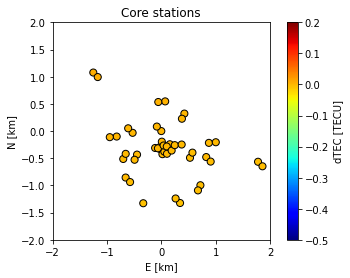

In [79]:
t_ind=2500

fig,axs=plt.subplots()
cl=axs.scatter((pp[:,1]-pp[0,1])/1000,(pp[:,0]-pp[0,0])/1000,c=data[:,t_ind],edgecolors='black',s=50,cmap='jet',norm=cm.Normalize(vmin=-0.5,vmax=0.2))
axs.set_xlim(-20,20)
axs.set_ylim(-60,30)
axs.set_ylabel('N [km]')
axs.set_xlabel('E [km]')
axs.set_aspect('equal')
fig.colorbar(cl,label='dTEC [TECU]')
axs.set_title('Remote stations')
plt.show()
plt.close()

fig,axs=plt.subplots()
cl=axs.scatter((pp[:-11,1]-pp[0,1])/1000,(pp[:-11,0]-pp[0,0])/1000,c=data[:-11,t_ind],edgecolors='black',s=50,cmap='jet',norm=cm.Normalize(vmin=-0.5,vmax=0.2))
axs.set_xlim(-2,2)
axs.set_ylim(-2,2)
axs.set_ylabel('N [km]')
axs.set_xlabel('E [km]')
axs.set_aspect('equal')
axs.set_title('Core stations')
fig.colorbar(cl,label='dTEC [TECU]')
plt.show()
plt.close()

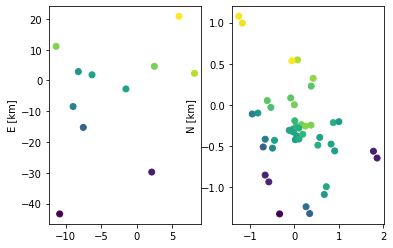

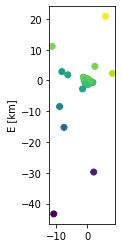

In [48]:
fig,axs=plt.subplots(ncols=2)
axs[0].scatter((pp[-11:,1]-pp[0,1])/1000,(pp[-11:,0]-pp[0,0])/1000,c=data[-11:,1000])
axs[1].scatter((pp[:-11,1]-pp[0,1])/1000,(pp[:-11,0]-pp[0,0])/1000,c=data[:-11,1000])
axs[1].set_ylabel('N [km]')
axs[0].set_ylabel('E [km]')
plt.show()
plt.close()



### TIME CONVERSION
#### Time is written as MJD

In [7]:
print(times[:10])

[4.86267060e+09 4.86267061e+09 4.86267062e+09 4.86267063e+09
 4.86267064e+09 4.86267065e+09 4.86267066e+09 4.86267067e+09
 4.86267068e+09 4.86267069e+09]


In [ ]:
date,time,T,tstart=time2date(times)

In [ ]:
#files=['piercepoints','altaz','coorlocal','stations','magindices','datamatrix','waveletdata']
#for s in files:
#        filename=glob.glob('C:/Users/Admin/dt/dtec/scripts/data/*/'+l+'/'+s+'.npz')[0]
#        fdat=np.load(filename,allow_pickle=True)
#        for k, v in fdat.items():
#            print(k)
#            exec(f"{k} = v")